# **Τεχνικές Εξόρυξης Δεδομένων - Εργασία 2** <br> 

---


**Κωνσταντίνος Μαϊδάτσης   (1115201800102) <br> Διονύσιος Μανιατάκος (1115201800104)**

## **Imports**

In [68]:
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.feature_extraction.text import *
from math import floor, ceil

## **Εισαγωγή/Προεπεξεργασία/Καθάρισμα Δεδομένων**

In [2]:
fake_data_raw = pd.read_csv("Fake.csv")
fake_data_raw.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
true_data_raw = pd.read_csv("True.csv")
true_data_raw.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_data = fake_data_raw.dropna()

#remove punctuation

fake_data['title'] = fake_data['title'].str.replace('[^\w\s]','')
fake_data['text'] = fake_data['text'].str.replace('[^\w\s]','')
fake_data['subject'] = fake_data['subject'].str.replace('[^\w\s]','')

#lowercase characters only

fake_data['title'] = fake_data['title'].str.lower()
fake_data['text'] = fake_data['text'].str.lower()
fake_data['subject'] = fake_data['subject'].str.lower()

fake_data.head()

,title,text,subject,date
0,donald trump sends out embarrassing new years...,donald trump just couldn t wish all americans ...,news,"December 31, 2017"
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,"December 31, 2017"
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,news,"December 30, 2017"
3,trump is so obsessed he even has obamas name ...,on christmas day donald trump announced that h...,news,"December 29, 2017"
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,"December 25, 2017"


In [5]:
true_data = true_data_raw.dropna()

#remove punctuation

true_data['title'] = true_data['title'].str.replace('[^\w\s]','')
true_data['text'] = true_data['text'].str.replace('[^\w\s]','')
true_data['subject'] = true_data['subject'].str.replace('[^\w\s]','')

#lowercase characters only

true_data['title'] = true_data['title'].str.lower()
true_data['text'] = true_data['text'].str.lower()
true_data['subject'] = true_data['subject'].str.lower()

true_data.head()

,title,text,subject,date
0,as us budget fight looms republicans flip thei...,washington reuters the head of a conservative...,politicsnews,"December 31, 2017"
1,us military to accept transgender recruits on ...,washington reuters transgender people will be...,politicsnews,"December 29, 2017"
2,senior us republican senator let mr mueller do...,washington reuters the special counsel invest...,politicsnews,"December 31, 2017"
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...,politicsnews,"December 30, 2017"
4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,politicsnews,"December 29, 2017"


## **Μελέτη των Δεδομένων**

### **α) Οπτικοποίηση Τίτλων**

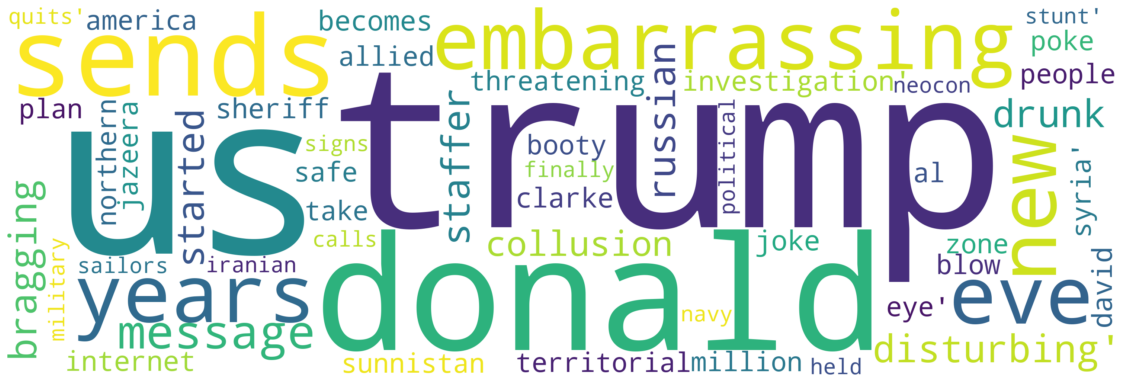

In [6]:
fake_titles_array = fake_data['title'].values

#create wordcloud from fake titles

wordcloud = WordCloud(width=3000,height=1000, background_color = "white", ).generate(str(fake_titles_array))

figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.show()

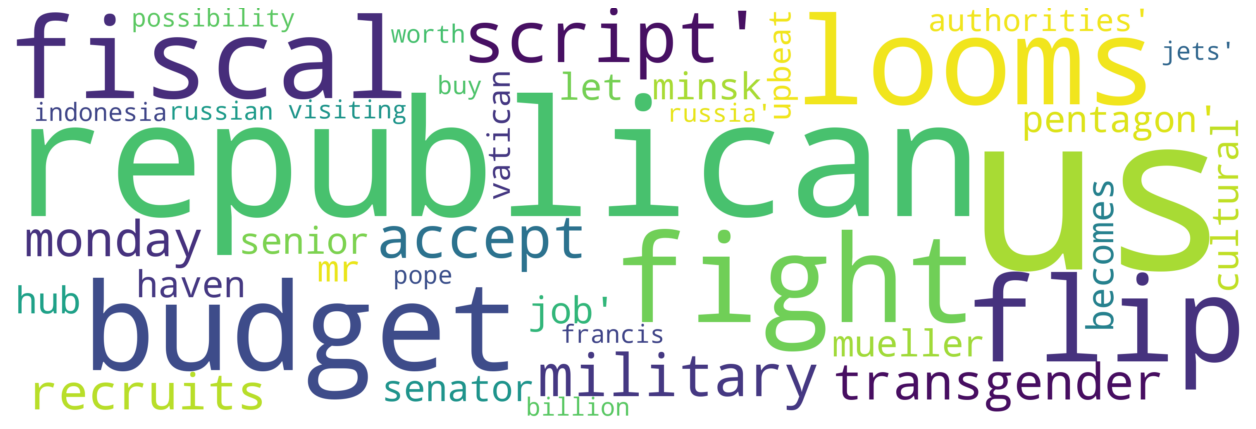

In [ ]:
true_titles_array = true_data['title'].values

#create wordcloud from true titles

wordcloud = WordCloud(width=3000,height=1000, background_color = "white", ).generate(str(true_titles_array))

figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.show()

### **β) Μέσοι Όροι Χαρακτήρων**

In [8]:
fake_titles_strlen = fake_data['title'].str.len()
fake_titles_strlen.head()
fake_titles_average_chars = fake_titles_strlen.mean()

fake_texts_strlen = fake_data['text'].str.len()
fake_texts_strlen.head()
fake_texts_average_chars = fake_texts_strlen.mean()

true_titles_strlen = true_data['title'].str.len()
true_titles_strlen.head()
true_titles_average_chars = true_titles_strlen.mean()

true_texts_strlen = true_data['text'].str.len()
true_texts_strlen.head()
true_texts_average_chars = true_texts_strlen.mean()

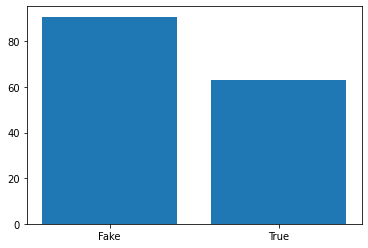

Fake Titles Average Characters: 90.82
True Titles Average Characters: 63.08


In [10]:
plt.bar(['Fake', 'True'],[fake_titles_average_chars, true_titles_average_chars])
plt.show()
print("Fake Titles Average Characters: %.2f" % fake_titles_average_chars)
print("True Titles Average Characters: %.2f" % true_titles_average_chars)

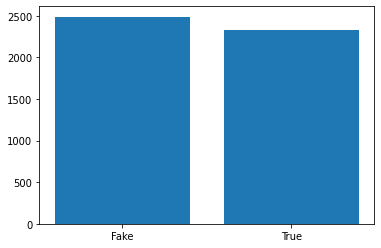

Fake Texts Average Characters: 2488.46
True Texts Average Characters: 2324.22


In [11]:
plt.bar(['Fake', 'True'],[fake_texts_average_chars, true_texts_average_chars])
plt.show()

print("Fake Texts Average Characters: %.2f" % fake_texts_average_chars)
print("True Texts Average Characters: %.2f" % true_texts_average_chars)

### **γ) Κατανομή Αριθμού Λέξεων**

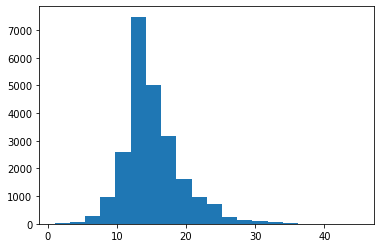

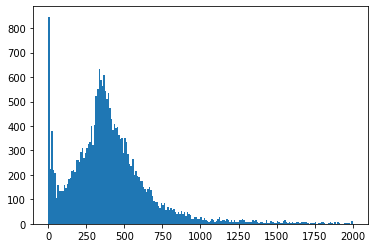

In [12]:
fake_titles_word_count = fake_data['title'].str.count(' ') + 1
fake_titles_word_count.head()

plt.hist(fake_titles_word_count, bins=20)
plt.show()

fake_text_word_count = fake_data['text'].str.count(' ') + 1
fake_text_word_count.head()

plt.hist(fake_text_word_count, bins=200, range=(0, 2000))
plt.show()

Παρατηρούμε ότι μεγάλος αριθμός κειμένων έχουν 1 λέξη. Αυτό οφείλεται στο γεγονός ότι πολλά κείμενα αποτελούνται από έναν μόνο σύνδεσμο, χωρίς άλλη πληροφορία

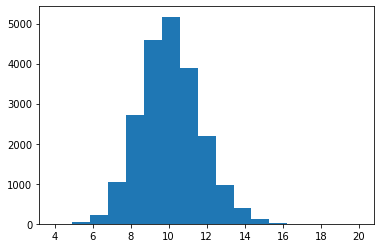

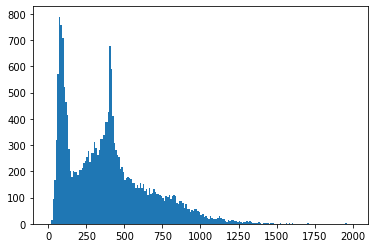

In [13]:
true_titles_word_count = true_data['title'].str.count(' ')+1
true_titles_word_count.head()

plt.hist(true_titles_word_count, bins=17)
plt.show()

true_text_word_count = true_data['text'].str.count(' ')+1
true_text_word_count.head()

plt.hist(true_text_word_count, bins=200, range=(0, 2000))
plt.show()

### **γ) Κατανομή Αριθμού Λέξεων Χωρίς Stopwords**

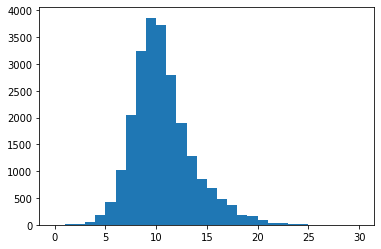

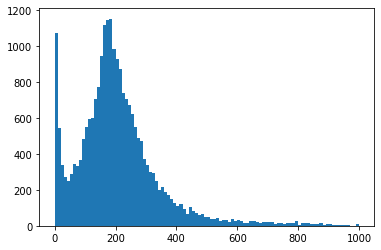

In [16]:
fake_data_no_stopwords = fake_data
fake_data_no_stopwords['title'] = fake_data_no_stopwords.title.apply(remove_stopwords)
fake_data_no_stopwords['text'] = fake_data_no_stopwords.text.apply(remove_stopwords)
fake_data_no_stopwords

fake_titles_word_count = fake_data_no_stopwords['title'].str.count(' ')+1
fake_titles_word_count.head()

plt.hist(fake_titles_word_count, bins=30, range=(0,30))
plt.show()

fake_text_word_count = fake_data_no_stopwords['text'].str.count(' ')+1
fake_text_word_count.head()

plt.hist(fake_text_word_count, bins=100, range=(0, 1000))
plt.show()


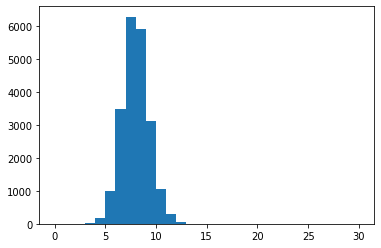

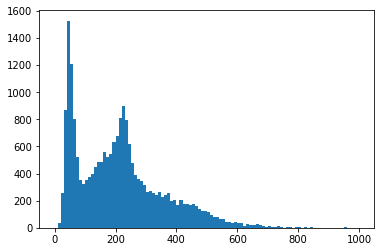

In [17]:
true_data_no_stopwords = true_data
true_data_no_stopwords['title'] = true_data_no_stopwords.title.apply(remove_stopwords)
true_data_no_stopwords['text'] = true_data_no_stopwords.text.apply(remove_stopwords)
true_data_no_stopwords

true_titles_word_count = true_data_no_stopwords['title'].str.count(' ')+1
true_titles_word_count.head()

plt.hist(true_titles_word_count, bins=30, range=(0,30))
plt.show()

true_text_word_count = true_data_no_stopwords['text'].str.count(' ')+1
true_text_word_count.head()

plt.hist(true_text_word_count, bins=100, range=(0, 1000))
plt.show()

### **ε) Εξαγωγή Συχνών Bigrams**

In [60]:
#takes a series of Strings and returns list of most frequent n-grams (default = bigram)
def most_frequent_ngrams(series, n=20, min_words=2, max_words=2):
  series_corpus = series.tolist()

  #turn to count vectorizer
  series_vector = CountVectorizer(ngram_range = (min_words, max_words), binary = False, max_features = 10000, min_df =0.001)

  series_df = pd.DataFrame(series_vector.fit_transform(series_corpus).toarray())

  series_df_summed = series_df.sum(axis=0).sort_values(ascending=False)

  results = []
  results_counts = []

  #retrieve n-grams from count vectorizer indexes
  for index in series_df_summed.index:
    results.append(series_vector.get_feature_names()[index])
    results_counts.append(series_df_summed[index])

  return results[:n], results_counts[:n]

In [62]:
def plot_most_frequent_bigrams(series, n=20):
  result = most_frequent_ngrams(series, n=n, min_words=2, max_words=2)

  figure(figsize=(40, 6))
  plt.xticks(fontsize=30, rotation=70)
  plt.bar(result[0], result[1])
  plt.show()

  plt.show()

**Fake Data Titles**

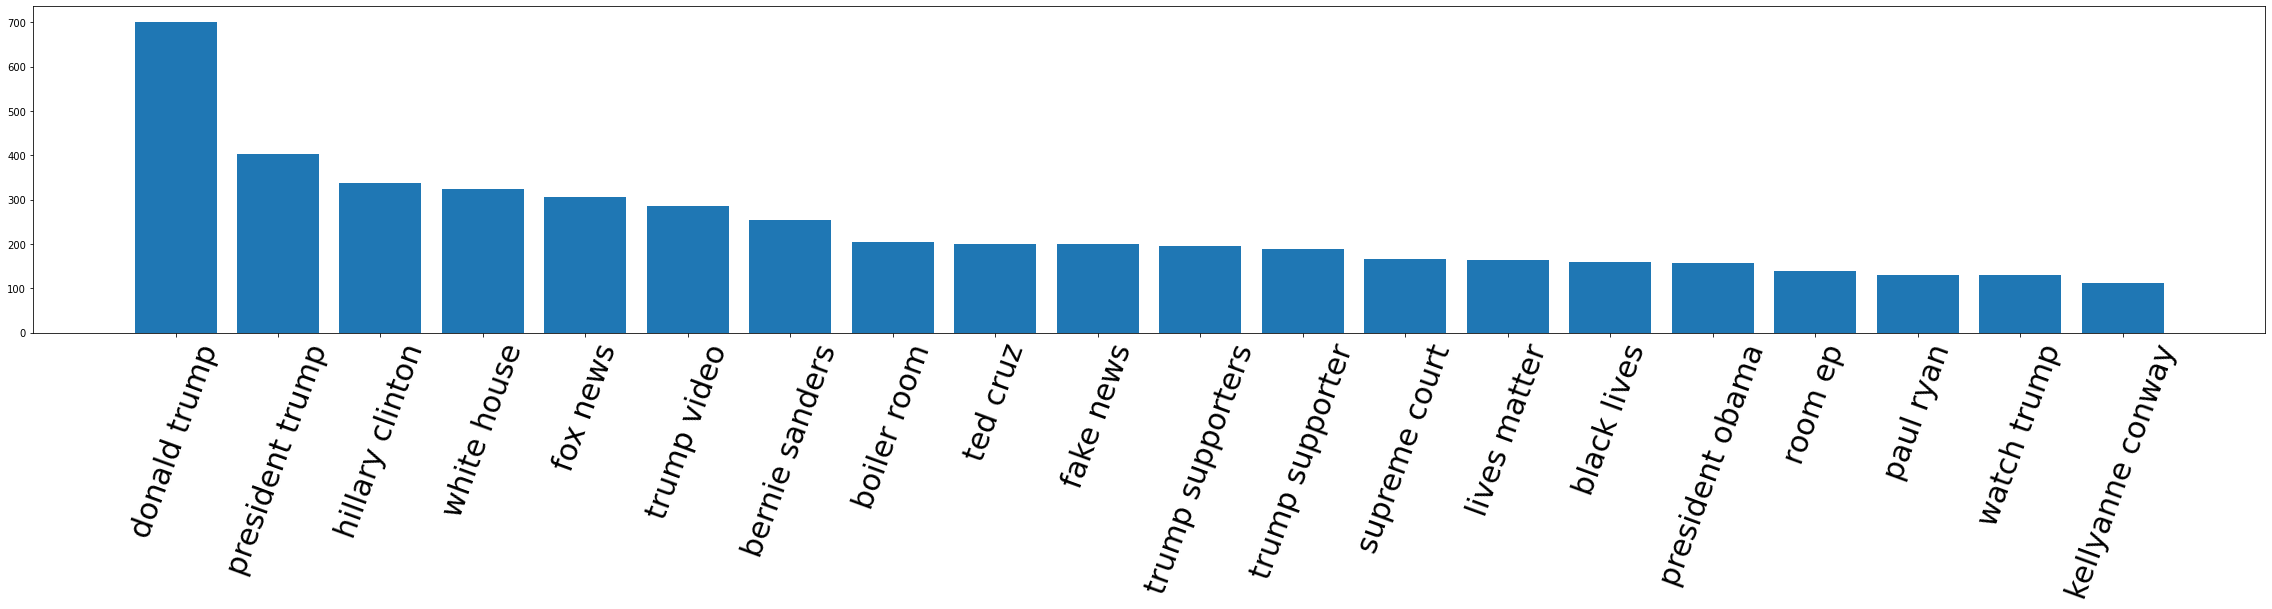

In [63]:
plot_most_frequent_bigrams(fake_data['title'])

**True Data Titles**

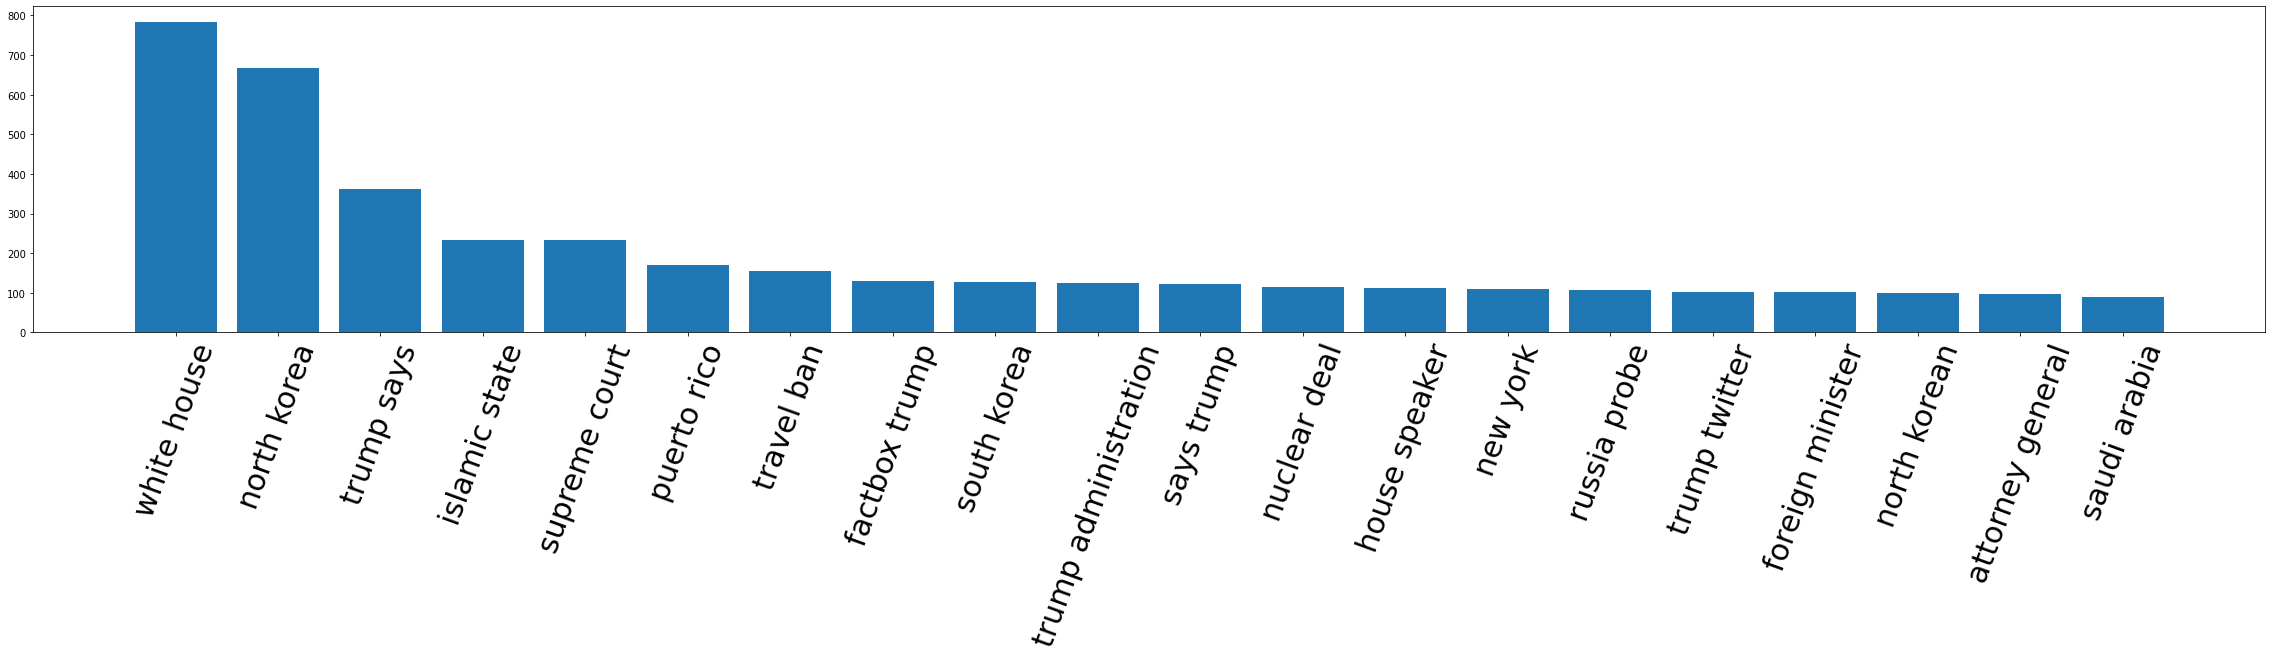

In [64]:
plot_most_frequent_bigrams(true_data['title'])

**Fake Data Texts**

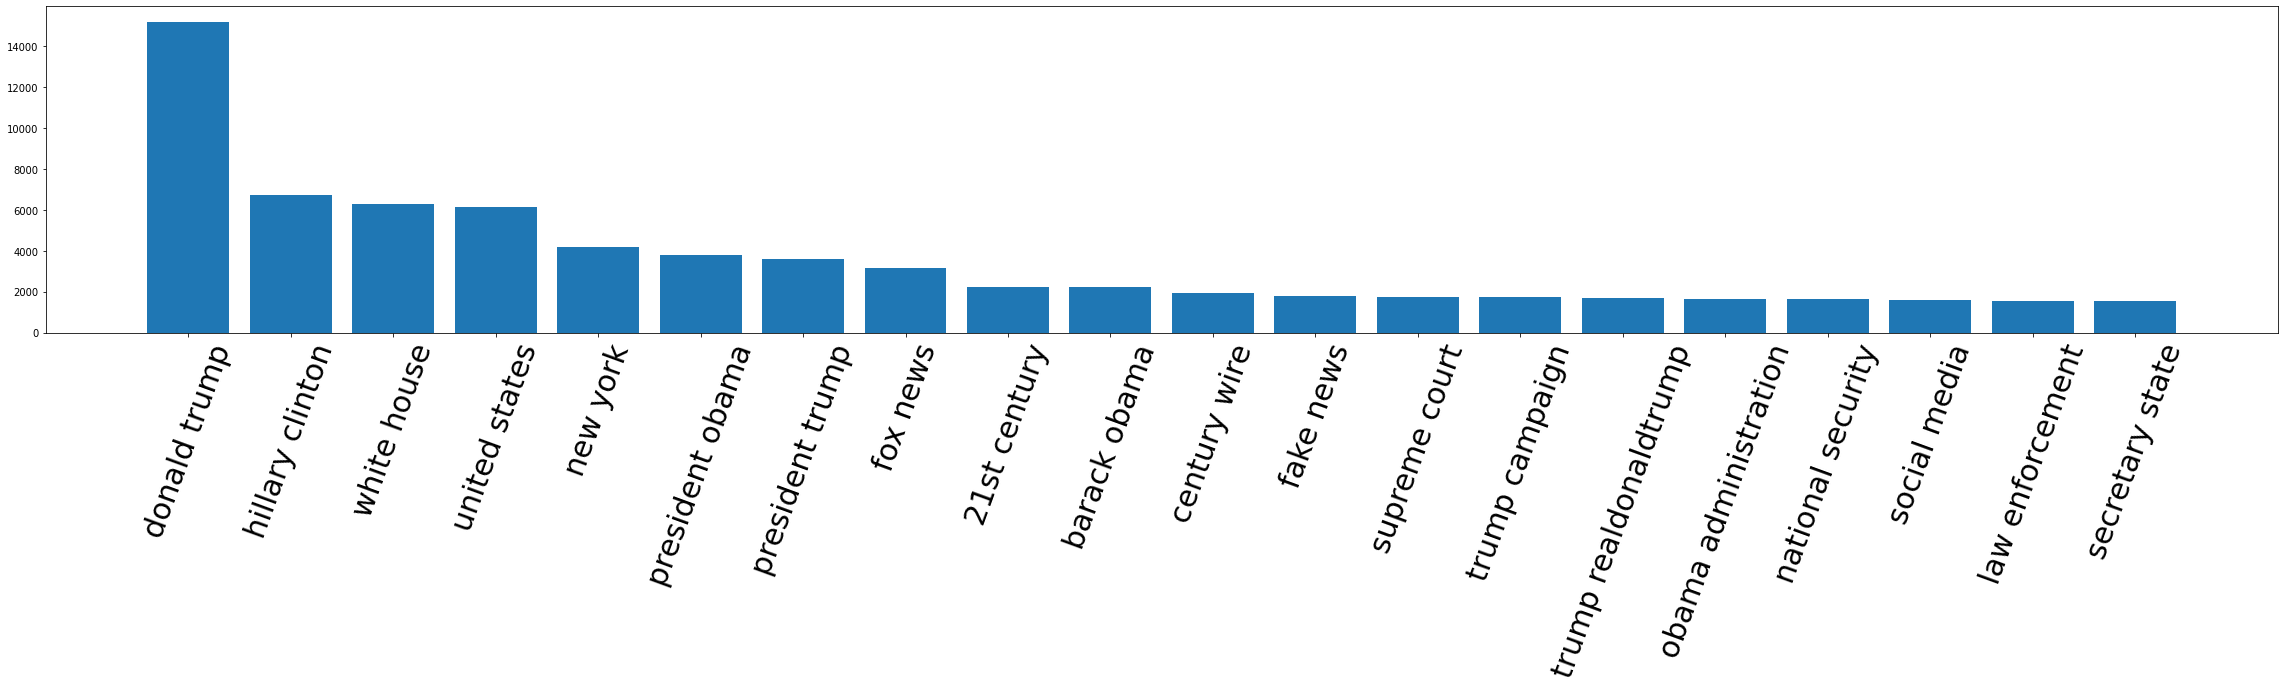

In [66]:
plot_most_frequent_bigrams(fake_data['text'])

**True Data Texts**

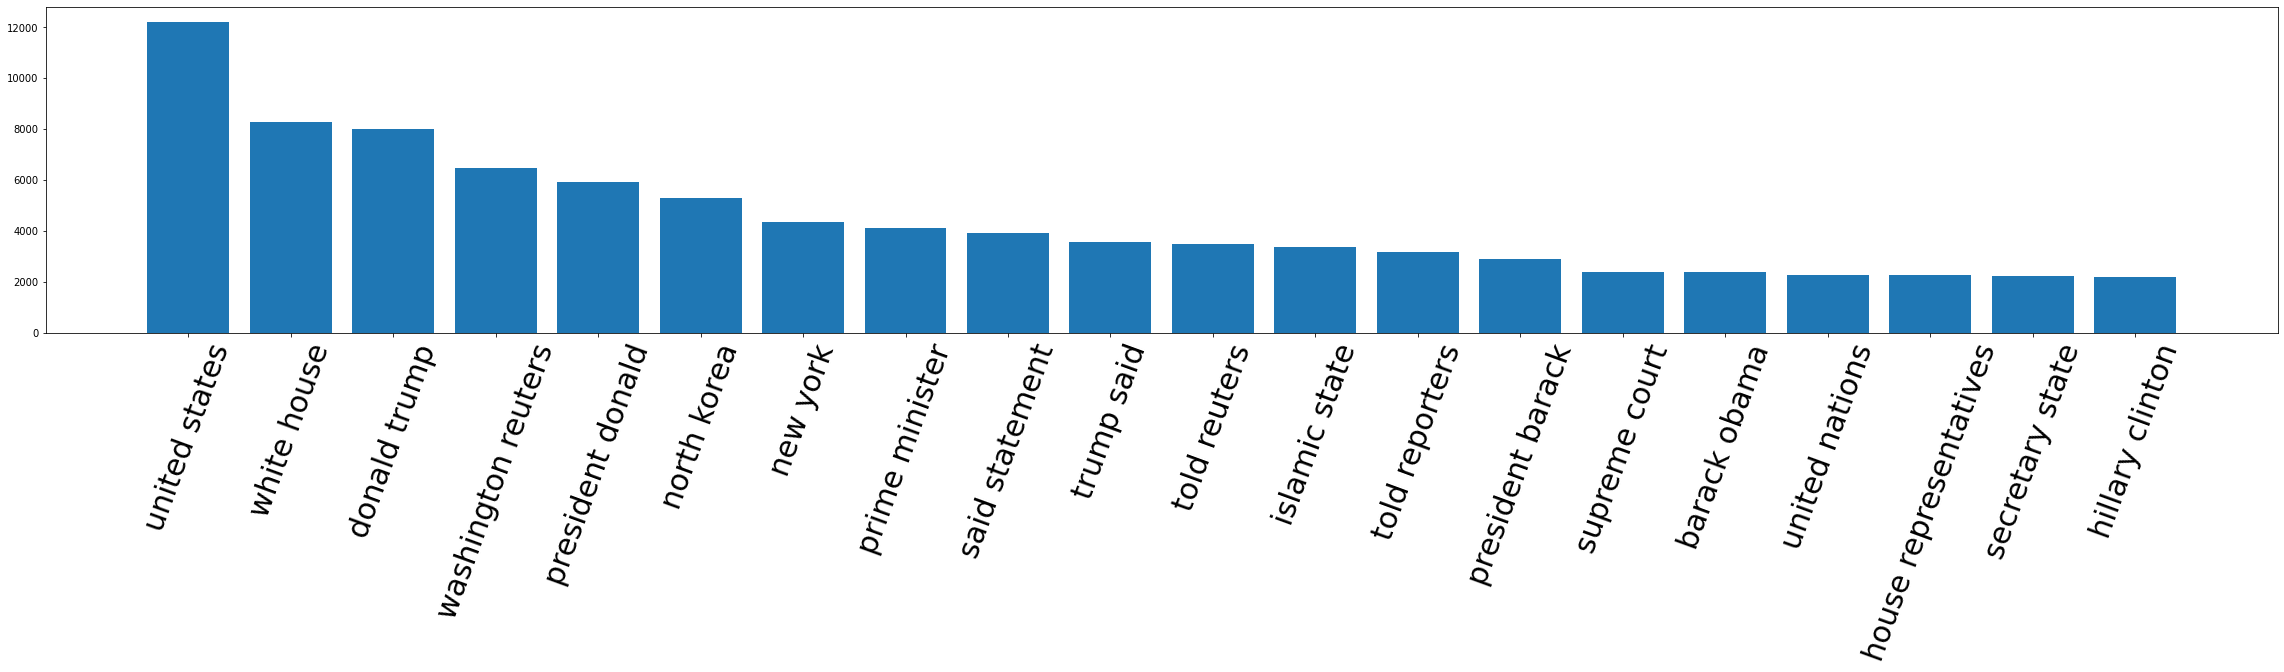

In [67]:
plot_most_frequent_bigrams(true_data['text'])

## **Δημιουργία Συνόλου Εκμάθησης & Δοκιμής**

In [70]:
#0 for fake data and 1 for true data
fake_data['label'] = 0  
true_data['label'] = 1
all_data = fake_data
all_data = all_data.append(true_data).reset_index(drop=True)  #concat true data to fake data

all_data = all_data.sample(frac=1).reset_index(drop=True)

def create_files(df, train_ratio, df_max_size= None):
  if(df_max_size is not None):
    df = df.head(df_max_size)
  train_size = int(train_ratio * (df.shape[0]-1))
  test_size = df.shape[0] - 1 - train_size
  train_data = df.head(train_size)
  test_data = df.tail(test_size)
  train_data.to_csv('train.csv', index=False)
  test_data.to_csv('test.csv', index=False)

create_files(all_data, 0.75)  #use 75% of the data to train

In [73]:
test1 = pd.read_csv('train.csv')
test1.head()

,title,text,subject,date,label
0,bluecollar democrats party economy stupid,reuters david betras trouble coming democratic...,politicsnews,"November 25, 2016",1
1,factbox trump twitter media american troops st...,following statements posted verified twitter a...,politicsnews,"July 3, 2017",1
2,analyst view democrat jones wins alabama senat...,new york reuters democrat doug jones won bitte...,politicsnews,"December 13, 2017",1
3,marco rubio comes mothballs issue dumbest stat...,marco rubio working doggedly mostlyempty senat...,news,"July 27, 2016",0
4,iran unveils ballistic missile range 2000 tasn...,london reuters iran s tasnim news agency repor...,worldnews,"September 22, 2017",1


## **Υλοποίηση Κατηγοριοποίησης (Classification)**

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

### **Διάβασμα Train/Test Αρχείων**

In [74]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df = train_df.fillna('')
test_df = test_df.fillna('')

#use all attribues(titles, texts and subjects) for the learning/testing process
train_documents = (train_df['title'] + ' ' + train_df['text'] + ' ' + train_df['subject']).tolist()
test_documents = (test_df['title'] + ' ' + test_df['text'] + ' ' + test_df['subject']).tolist()

### **Δημιουργία Bag of Words**

In [75]:
bow_count_vectorizer = CountVectorizer(ngram_range = (1,1), min_df = 0.05 )
bow_count_vectorizer.fit(train_documents)

train_bow = bow_count_vectorizer.transform(train_documents)
train_bow_df = pd.DataFrame(train_bow.toarray())

test_bow = bow_count_vectorizer.transform(test_documents)
test_bow_df = pd.DataFrame(test_bow.toarray())

### **Δημιουργία Tf-Idf**

In [76]:
tf_idf_vectorizer = TfidfVectorizer(ngram_range = (1,1), min_df = 0.05 )
tf_idf_vectorizer.fit(train_documents)

train_tf_idf = tf_idf_vectorizer.transform(train_documents)
train_tf_idf_df = pd.DataFrame(train_tf_idf.toarray())

test_tf_idf = tf_idf_vectorizer.transform(test_documents)
test_tf_idf_df = pd.DataFrame(test_tf_idf.toarray())

### **Δημιουργία Word2vec**

In [77]:
import gensim.downloader

glove_vectors = gensim.downloader.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [78]:
import numpy as np

train_document_vectors = []

for text in train_documents:
  vectors = []
  for word in text.split(' '):
    try:
      vectors.append(glove_vectors[word])
    except KeyError:
      vectors.append([0] * 25)
  data = np.array(vectors)
  train_document_vectors.append(np.average(data, axis=0).tolist())


test_document_vectors = []

for text in test_documents:
  vectors = []
  for word in text.split(' '):
    try:
      vectors.append(glove_vectors[word])
    except KeyError:
      vectors.append([0] * 25)
  data = np.array(vectors)
  test_document_vectors.append(np.average(data, axis=0).tolist())



### **Εκπαίδεση/Αξιολόγηση με Bag of Words**

**Logistic Regression**

In [81]:
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(train_bow_df, train_df['label'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
logistic_regression_model.score(test_bow_df, test_df['label'])

0.9992873051224944

In [87]:
predictions = logistic_regression_model.predict(test_bow_df)
f1_score(test_df['label'], predictions)

0.9992412746585735

In [ ]:
Παρατηρούμε αρκετά μεγάλη ακρίβεια ταξινόμησης

**Naive Bayes**

In [88]:
naive_bayes_model = GaussianNB()

naive_bayes_model.fit(train_bow_df, train_df['label'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [89]:
naive_bayes_model.score(test_bow_df, test_df['label'])

0.9229398663697105

In [90]:
predictions = naive_bayes_model.predict(test_bow_df)
f1_score(test_df['label'], predictions)

0.9241959512750855

Παρατηρούμε ότι η ακρίβεια είναι μικρότερη αλλά και ο χρόνος εκπαίδευσης μικρότερος. Ίσως η πτώση της ακρίβειας να οφείλεται στην αφελή υπόθεση του Bayes, δηλαδή στην υποσυνθήκη ανερξαρτησία των δεδομένων (η οποία μπορεί να μην ισχύει πάντα).

**Support Vector Machines**

In [91]:
svm_model = svm.SVC()

svm_model.fit(train_bow_df, train_df['label'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
svm_model.score(test_bow_df, test_df['label'])

0.9955456570155902

In [93]:
predictions = svm_model.predict(test_bow_df)
f1_score(test_df['label'], predictions)

0.9952525636156474

Παρατηρούμε ότι και πάλι η ακρίβεια κατηγοριοποίησης είναι αρκετά υψηλή (λίγο χαμηλότερη από το Logistic Regression), αλλά ο χρόνος εκπαίδευσης μεγαλύτερος

**Random Forests**

In [ ]:
random_forests_model = RandomForestClassifier(max_depth=1, random_state=0)

random_forests_model.fit(train_bow_df, train_df['label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
random_forests_model.score(test_bow_df, test_df['label'])

0.9853006681514477

In [ ]:
predictions = random_forests_model.predict(test_bow_df)
f1_score(test_df['label'], predictions)

0.9843260188087775

### **Εκπαίδεση/Αξιολόγηση με Tf-Idf**

**Logistic Regression**

In [ ]:
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(train_tf_idf_df, train_df['label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logistic_regression_model.score(test_tf_idf_df, test_df['label'])

0.992694877505568

In [ ]:
predictions = logistic_regression_model.predict(test_tf_idf_df)
f1_score(test_df['label'], predictions)

0.9922801732253813

**Naive Bayes**

In [ ]:
naive_bayes_model = GaussianNB()

naive_bayes_model.fit(train_tf_idf_df, train_df['label'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
naive_bayes_model.score(test_tf_idf_df, test_df['label'])

0.9657015590200445

In [ ]:
predictions = naive_bayes_model.predict(test_bow_df)
f1_score(test_df['label'], predictions)

0.9719420502475702

**Support Vector Machines**

In [ ]:
svm_model = svm.SVC()

svm_model.fit(train_tf_idf_df, train_df['label'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_model.score(test_tf_idf_df, test_df['label'])

0.9981291759465479

In [ ]:
predictions = svm_model.predict(test_tf_idf_df)
f1_score(test_df['label'], predictions)

0.9980205485908191

**Random Forests**

In [ ]:
random_forests_model = RandomForestClassifier(max_depth=10, random_state=0)

random_forests_model.fit(train_tf_idf_df, train_df['label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
random_forests_model.score(test_tf_idf_df, test_df['label'])

0.9988418708240534

In [ ]:
predictions = random_forests_model.predict(test_tf_idf_df)
f1_score(test_df['label'], predictions)

0.9987748562812176

**Bonus**

In [ ]:
from sklearn.neural_network import MLPClassifier
deep_learning_model = MLPClassifier(random_state=1, max_iter=600).fit(train_tf_idf_df, train_df['label'])

deep_learning_model.score(test_tf_idf_df, test_df['label'])


0.9983073496659243

In [ ]:
from sklearn.ensemble import VotingClassifier

bonus_model = VotingClassifier(estimators=[('dl', deep_learning_model), ('rf', random_forests_model)], voting='soft', weights=[1,2]).fit(train_tf_idf_df, train_df['label'])
bonus_model.score(test_tf_idf_df, test_df['label'])

0.9991091314031181

### **Εκπαίδεση/Αξιολόγηση με Word2vec**

**Logistic Regression**

In [ ]:
logistic_regression_model = LogisticRegression()

train_document_vectors[0:5]
df = pd.DataFrame(train_document_vectors)
df.head()
logistic_regression_model.fit(df, train_df['label'])


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logistic_regression_model.score(test_document_vectors, test_df['label'])

0.8955902004454342

In [ ]:
predictions = logistic_regression_model.predict(test_document_vectors)
f1_score(test_df['label'], predictions)


0.8902827185920238

**Naive Bayes**

In [ ]:
naive_bayes_model = GaussianNB()

naive_bayes_model.fit(train_document_vectors, train_df['label'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
naive_bayes_model.score(test_document_vectors, test_df['label'])

0.8505122494432071

In [ ]:
predictions = naive_bayes_model.predict(test_document_vectors)
f1_score(test_df['label'], predictions)

0.850205320478486

**Support Vector Machines**

In [ ]:
svm_model = svm.SVC()

svm_model.fit(train_document_vectors, train_df['label'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_model.score(test_document_vectors, test_df['label'])

0.9016481069042316

In [ ]:
predictions = svm_model.predict(test_document_vectors)
f1_score(test_df['label'], predictions)

0.8968802540631422

**Random Forests**

In [ ]:
random_forests_model = RandomForestClassifier(max_depth=1, random_state=0)

random_forests_model.fit(train_document_vectors, train_df['label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
random_forests_model.score(test_document_vectors, test_df['label'])

0.8439198218262807

In [ ]:
predictions = random_forests_model.predict(test_document_vectors)
f1_score(test_df['label'], predictions)

0.8395898187145211

### **Bonus**

In [ ]:
from sklearn.neural_network import MLPClassifier
deep_learning_model = MLPClassifier(random_state=1, max_iter=300).fit(train_document_vectors, train_df['label'])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
deep_learning_model.score(test_document_vectors, test_df['label'])

0.9353229398663697

In [ ]:
predictions = deep_learning_model.predict(test_document_vectors)
f1_score(test_df['label'], predictions)

0.9318693693693693